# Sacarsm Classification Using TensorFlow

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train_data = pd.read_csv("Train_Data.csv")

In [3]:
train_data.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


In [4]:
## lets check for any missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44262 entries, 0 to 44261
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      44262 non-null  object
 1   is_sarcastic  44262 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 691.7+ KB


## Preprocessing

In [9]:
def preprocessing_inputs(df):
    df = df.copy()
    
    #split dataframe into x and y
    y = df['is_sarcastic']
    x = df['headline']
    
    # lets split into train and test dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=2)
    
    
    return x_train, x_test, y_train, y_test

In [10]:
x_train, x_test, y_train, y_test = preprocessing_inputs(train_data)

In [11]:
x_train

9238     candidates preparing for colorado debate condi...
37870        google launches 'the google' for older adults
9263     local cat attempts world record for things sat on
41038                obama blasted by cool, refreshing air
6910     bush campaign paints kerry as pre-raphaelite c...
                               ...                        
31019    trump suffering horrible indigestion after eat...
30280    timmy' kimmel explains how the truth works to ...
6637     i don't exist: a reflection on contemporary jo...
35343             medicine has an unhealthy gender pay gap
23720    colleges suspend students for sexual assault, ...
Name: headline, Length: 30983, dtype: object

In [12]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

tokenizer.fit_on_texts(x_train)

In [14]:
len(tokenizer.word_index)

27414

In [15]:
tokenizer.texts_to_sequences(x_train)

[[600, 3827, 5, 1985, 208, 2468, 9, 155, 12219, 1692, 12220],
 [888, 1477, 200, 12221, 5, 1040, 4895],
 [198, 497, 1830, 89, 460, 5, 143, 3592, 7],
 [68, 4481, 17, 1062, 9776, 465],
 [187, 133, 4896, 1041, 26, 1525, 12222, 12223],
 [38, 4135, 2, 3011, 152, 63, 77, 461, 78, 287, 592, 283, 518],
 [127, 37, 6059, 145, 41, 2469, 466, 626],
 [13, 147, 1208, 41, 1761, 1, 976, 1248, 532, 31, 134, 12224],
 [31, 958, 31, 1762, 262],
 [9777, 9778, 1362, 47, 678, 2577, 11, 1831, 1763, 467, 5, 2055],
 [3363,
  6949,
  9779,
  415,
  2578,
  1325,
  7,
  3593,
  2,
  12,
  2579,
  781,
  1,
  305,
  4136,
  165,
  348,
  1,
  154,
  93,
  295],
 [601, 12225, 8052, 70, 9780],
 [330, 6060, 9, 8053, 9781, 3594, 23, 662, 2056, 2, 89, 2233, 4, 57],
 [48, 267, 1986, 924, 219, 1326, 1832, 17, 833, 4, 45, 6, 3181],
 [3828, 435, 940, 370, 1438, 3012, 3828, 2704, 12226, 509],
 [178, 252, 1, 1987, 6, 544, 524, 799, 3182, 9782],
 [38, 3595, 1693, 15, 1580, 620, 97, 959, 92, 1, 1988, 179, 119, 237, 51, 12],
 [2

In [20]:
#pad
tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen= 152, padding= 'post')

array([[ 600, 3827,    5, ...,    0,    0,    0],
       [ 888, 1477,  200, ...,    0,    0,    0],
       [ 198,  497, 1830, ...,    0,    0,    0],
       ...,
       [  81,  172, 3170, ...,    0,    0,    0],
       [3359,   36,   62, ...,    0,    0,    0],
       [3785, 6302,  301, ...,    0,    0,    0]])

In [19]:

#get longest sequennce
np.max(list(map(len, tokenizer.texts_to_sequences(x_train)))) #put in maxlen above

152

In [21]:
## lets define a function that takes text and turn to sequence i.e combining all the codes above
def text_to_sequence(texts, tokenizer, train=True, max_seq_length=None):
    sequences = tokenizer.texts_to_sequences(texts)
    
    ## process train data
    if train == True: #then calculate max_seq_length
        max_seq_length = np.max(list(map(len, sequences)))
        
    ## test data, pass in max_seq_length
    sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen= max_seq_length, padding= 'post')
    
    
    return sequences
    
        
        

In [22]:
## lets continue with this function
def preprocessing_inputs(df):
    df = df.copy()
    
    #split dataframe into x and y
    y = df['is_sarcastic']
    x = df['headline']
    
    # lets split into train and test dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=2)
    
    
    #create tokenizer
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(x_train)
    #print out Vocab length
    print("Vocab Length is:", len(tokenizer.word_index) + 1)
    
    ## get sequence data
    x_train = text_to_sequence(texts= x_train, tokenizer= tokenizer, train=True)
    x_test = text_to_sequence(texts= x_test, tokenizer= tokenizer, train=False, max_seq_length=x_train.shape[1])
    
    ## print out sequence length
    print("Sequence Length:", x_train.shape[1])
    
    return x_train, x_test, y_train, y_test

In [23]:
x_train, x_test, y_train, y_test = preprocessing_inputs(train_data)

Vocab Length is: 27415
Sequence Length: 152


In [24]:
x_train

array([[ 600, 3827,    5, ...,    0,    0,    0],
       [ 888, 1477,  200, ...,    0,    0,    0],
       [ 198,  497, 1830, ...,    0,    0,    0],
       ...,
       [  81,  172, 3170, ...,    0,    0,    0],
       [3359,   36,   62, ...,    0,    0,    0],
       [3785, 6302,  301, ...,    0,    0,    0]])

In [26]:
y_train.value_counts()

0    16784
1    14199
Name: is_sarcastic, dtype: int64

## Model Creation and Training

In [38]:
inputs = tf.keras.Input(shape=(152,))

x = tf.keras.layers.Embedding(
    input_dim= 27415,  #vocab length
    output_dim= 70 #choose
)(inputs)

#lets flatten the layer to single
x = tf.keras.layers.Flatten()(x)

#create 2 neuron layers
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

#output, 1 value sigmoid
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [42]:
model = tf.keras.Model(inputs= inputs, outputs= outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ] 
)

print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 152)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 152, 70)           1919050   
                                                                 
 flatten_2 (Flatten)         (None, 10640)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               1362048   
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,297,739
Trainable params: 3,297,739
Non-tra

In [43]:
## lets train the model and store in history

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100
775/775 [==============================] - 45s 55ms/step - loss: 0.3497 - accuracy: 0.8303 - auc: 0.9219 - val_loss: 0.2152 - val_accuracy: 0.9142 - val_auc: 0.9721
Epoch 2/100
775/775 [==============================] - 38s 49ms/step - loss: 0.0597 - accuracy: 0.9793 - auc: 0.9970 - val_loss: 0.2307 - val_accuracy: 0.9224 - val_auc: 0.9752
Epoch 3/100
775/775 [==============================] - 39s 51ms/step - loss: 0.0050 - accuracy: 0.9985 - auc: 0.9999 - val_loss: 0.3335 - val_accuracy: 0.9234 - val_auc: 0.9631
Epoch 4/100
775/775 [==============================] - 37s 48ms/step - loss: 4.9357e-04 - accuracy: 0.9999 - auc: 1.0000 - val_loss: 0.3979 - val_accuracy: 0.9200 - val_auc: 0.9597


## Results

In [44]:
results = model.evaluate(x_test, y_test, verbose=0)

#print accuracy as a percentage
print("Accuracy is: {:.2f}%".format(results[1] * 100))

#print AUC
print("         AUC: {:.5f}".format(results[2]))

Accuracy is: 91.22%
         AUC: 0.96984


In [45]:
## lets predict
model.predict(x_test)

415/415 [==============================] - 4s 8ms/step


array([[0.98352206],
       [0.14302935],
       [0.9883644 ],
       ...,
       [0.00626325],
       [0.003435  ],
       [0.5845321 ]], dtype=float32)

In [49]:
## lets turn the prediction to 1 or 0 anything above 0.5 is 1

y_pred = np.squeeze(model.predict(x_test) >= 0.5).astype(np.int)

415/415 [==============================] - 1s 2ms/step


C:\Users\Timileyin\AppData\Local\Temp\ipykernel_14836\3841935115.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.squeeze(model.predict(x_test) >= 0.5).astype(np.int)


In [50]:
## lets get confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
#classifiication report
clr = classification_report(y_test, y_pred, labels=[0, 1], target_names= ['Np Sacarsm', 'Sacarsm'])

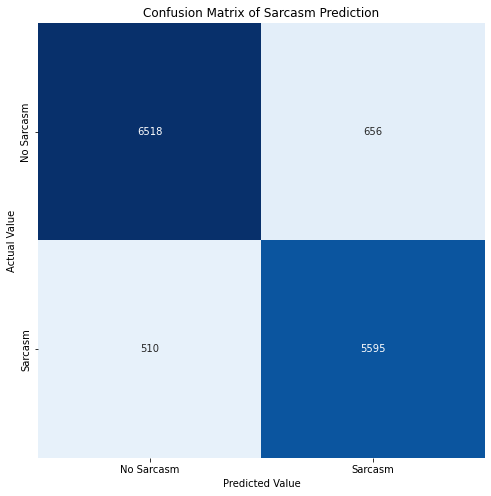

Classification Report: 
--------------------------------------------------------
               precision    recall  f1-score   support

  Np Sacarsm       0.93      0.91      0.92      7174
     Sacarsm       0.90      0.92      0.91      6105

    accuracy                           0.91     13279
   macro avg       0.91      0.91      0.91     13279
weighted avg       0.91      0.91      0.91     13279



In [52]:
## plot

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels= ['No Sarcasm', 'Sarcasm'])
plt.yticks(ticks=[0.5, 1.5], labels= ['No Sarcasm', 'Sarcasm'])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix of Sarcasm Prediction")
plt.show()

## print classification report
print("Classification Report: \n--------------------------------------------------------\n", clr)

## Test Data 

In [91]:
test_data = pd.read_csv("Test_Data.csv")

In [92]:
test_data.head()

,headline
0,area stand-up comedian questions the deal with...
1,dozens of glowing exit signs mercilessly taunt...
2,perfect response to heckler somewhere in prop ...
3,gop prays for ossoff lossoff
4,trevor noah says the scary truth about trump's...


In [99]:
test_data = test_data['headline']

In [103]:
test_data

0        area stand-up comedian questions the deal with...
1        dozens of glowing exit signs mercilessly taunt...
2        perfect response to heckler somewhere in prop ...
3                             gop prays for ossoff lossoff
4        trevor noah says the scary truth about trump's...
                               ...                        
11061    house conservatives claim democrats have faile...
11062    area man having one of his little bursts of en...
11063     there is nothing libertarian about conservatives
11064    mike pompeo startled after seeing 'beware of h...
11065          how pets can help prevent suicide #nspw2017
Name: headline, Length: 11066, dtype: object

In [100]:
test_tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [101]:
test_tokenizer.fit_on_texts(test_data)

In [102]:
test_tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'is': 9,
 'with': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'be': 18,
 'by': 19,
 'this': 20,
 'after': 21,
 'up': 22,
 'how': 23,
 'it': 24,
 'as': 25,
 'not': 26,
 'out': 27,
 'that': 28,
 'his': 29,
 'what': 30,
 'just': 31,
 'who': 32,
 'are': 33,
 'has': 34,
 'your': 35,
 'year': 36,
 'will': 37,
 'he': 38,
 'all': 39,
 'into': 40,
 'more': 41,
 'one': 42,
 'have': 43,
 'can': 44,
 'over': 45,
 'why': 46,
 'day': 47,
 'report': 48,
 'u': 49,
 'woman': 50,
 'donald': 51,
 'area': 52,
 'first': 53,
 's': 54,
 'time': 55,
 'says': 56,
 'old': 57,
 'get': 58,
 "trump's": 59,
 'no': 60,
 'off': 61,
 'like': 62,
 'life': 63,
 'now': 64,
 'people': 65,
 'house': 66,
 'her': 67,
 'obama': 68,
 "'": 69,
 'an': 70,
 'white': 71,
 'than': 72,
 'my': 73,
 'i': 74,
 'make': 75,
 'back': 76,
 'still': 77,
 'women': 78,
 'they': 79,
 'clinton': 80,
 'down': 81,
 '

In [104]:
len(test_tokenizer.word_index)

17707

In [105]:
test_tokenizer.texts_to_sequences(test_data)

[[52, 817, 22, 1413, 570, 3, 273, 10, 1414, 3684, 2343],
 [1415, 2, 3685, 4549, 680, 5954, 9156, 9157, 344],
 [370, 681, 1, 9158, 3101, 4, 5955, 9159, 4550],
 [100, 3686, 5, 9160, 9161],
 [1551, 1552, 56, 3, 3102, 1298, 16, 59, 3687, 122, 166],
 [1299, 5956, 972, 11, 1106, 1553, 5, 9162, 5957],
 [21, 9163, 484, 295, 5958, 1, 209, 174, 92, 2092, 867],
 [973, 1107, 106, 9164, 1108],
 [3, 2344, 2, 261],
 [3103, 108, 2674, 157, 203, 10, 252, 595, 2675, 526, 646, 114],
 [1869, 188, 210, 322, 253, 5959, 2345, 1, 31, 43, 766, 10, 24],
 [9165, 2346, 396, 5960, 9166, 5, 123, 2676, 6, 1554],
 [316, 3, 282, 381, 107, 195, 8, 2347, 237],
 [818, 1300, 12, 408, 45, 371, 5961, 4551],
 [110, 189, 1301, 4552, 5962, 2093, 7, 9167, 4553, 9168],
 [1555, 68, 3104, 551, 1, 29, 596, 16, 127, 5, 198, 283],
 [973, 9169, 132, 9170, 7, 6, 1870, 9171, 5963],
 [5964, 9172, 81, 262, 88, 148, 3688, 6, 1039, 16, 527],
 [145, 3689, 4554, 2348, 27, 45, 6, 618, 505, 345, 14, 5965, 5966],
 [24, 9173, 45, 2677, 96, 45],
 

In [106]:
## to get the longest sequence instead
np.max (list (map(len, test_tokenizer.texts_to_sequences(test_data))))

30

In [107]:
## test data into sequence

## to have uniform sequence, pad

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_tokenizer.texts_to_sequences(test_data), maxlen = 152, padding= 'post')

In [108]:
test_data

array([[   52,   817,    22, ...,     0,     0,     0],
       [ 1415,     2,  3685, ...,     0,     0,     0],
       [  370,   681,     1, ...,     0,     0,     0],
       ...,
       [  280,     9,   460, ...,     0,     0,     0],
       [  346,  3772, 17703, ...,     0,     0,     0],
       [   23,  2506,    44, ...,     0,     0,     0]])

In [121]:
## lets predict with the model

y_pred_testdata = np.squeeze(model.predict(test_data) >= 0.5).astype(np.int)

346/346 [==============================] - 1s 2ms/step


C:\Users\Timileyin\AppData\Local\Temp\ipykernel_14836\3112458359.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_testdata = np.squeeze(model.predict(test_data) >= 0.5).astype(np.int)


In [123]:
y_pred_testdata

array([0, 0, 1, ..., 1, 1, 1])

### Export out the prediction as a csv file

In [124]:
y_pred_testdata = pd.DataFrame(y_pred_testdata)

In [125]:
y_pred_testdata.head()

,0
0,0
1,0
2,1
3,1
4,1


In [126]:
header = ["Prediction"]
y_pred_testdata.to_csv("Sarcasm Prediction Oladayo Submission.csv", header= header, index=False)